In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler

# 1.Load data

In [21]:
deletionlibrary_phenotype = pd.read_excel("../resources/Hayles_2013_OB_merged_categories_sysIDupdated.xlsx")
manual_clusters = pd.read_excel("../resources/20250317_plateau_GWMs.xlsx", index_col=0)["cluster_order"].to_dict()

pre_res = pd.read_csv("../results/HD_DIT_HAP/18_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv", sep="\t").dropna(subset=["um", "lam"])
pre_res["cluster"] = pre_res["Systematic ID"].map(manual_clusters)
pre_res = pd.merge(pre_res, deletionlibrary_phenotype[["Updated_Systematic_ID", "Consistency at temperatures", "One or multi basic phenotypes", "Category"]], left_on="Systematic ID", right_on="Updated_Systematic_ID", how="left").drop(columns=["Updated_Systematic_ID"])
L1_res = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/tmp/curve_fitting_test/L1_reg3.tsv", sep="\t").dropna(subset=["um", "lam"])
L1_res["cluster"] = L1_res["Systematic ID"].map(manual_clusters)
L1_res = pd.merge(L1_res, deletionlibrary_phenotype[["Updated_Systematic_ID", "Consistency at temperatures", "One or multi basic phenotypes", "Category"]], left_on="Systematic ID", right_on="Updated_Systematic_ID", how="left").drop(columns=["Updated_Systematic_ID"])
L2_res = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/tmp/curve_fitting_test/L1_reg4.tsv", sep="\t").dropna(subset=["um", "lam"])
L2_res["cluster"] = L2_res["Systematic ID"].map(manual_clusters)
L2_res = pd.merge(L2_res, deletionlibrary_phenotype[["Updated_Systematic_ID", "Consistency at temperatures", "One or multi basic phenotypes", "Category"]], left_on="Systematic ID", right_on="Updated_Systematic_ID", how="left").drop(columns=["Updated_Systematic_ID"])

gRNA = pd.read_excel("../resources/merged_gRNA_with_DIT_HAP_sorted.xlsx", index_col=0)[["Systematic ID", "A", "um", "lam"]].rename(columns={"A": "A_gRNA", "um": "um_gRNA", "lam": "lam_gRNA"})

merged_res = pd.merge(L1_res, L2_res, on=["Systematic ID", "Name", "FYPOviability", "DeletionLibrary_essentiality"], how="inner", suffixes=("_L1", "_L2"))
merged_res = pd.merge(merged_res, pre_res, on=["Systematic ID", "Name", "FYPOviability", "DeletionLibrary_essentiality"], how="inner")
merged_res = pd.merge(merged_res, gRNA, on="Systematic ID", how="left")

output_dir = Path("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/tmp/curve_fitting_test")

merged_res.to_csv(output_dir / "merged_res.tsv", sep="\t", index=False)

# 2.Plot

In [22]:
# pdf = PdfPages(output_dir / "curve_fitting_test.pdf")

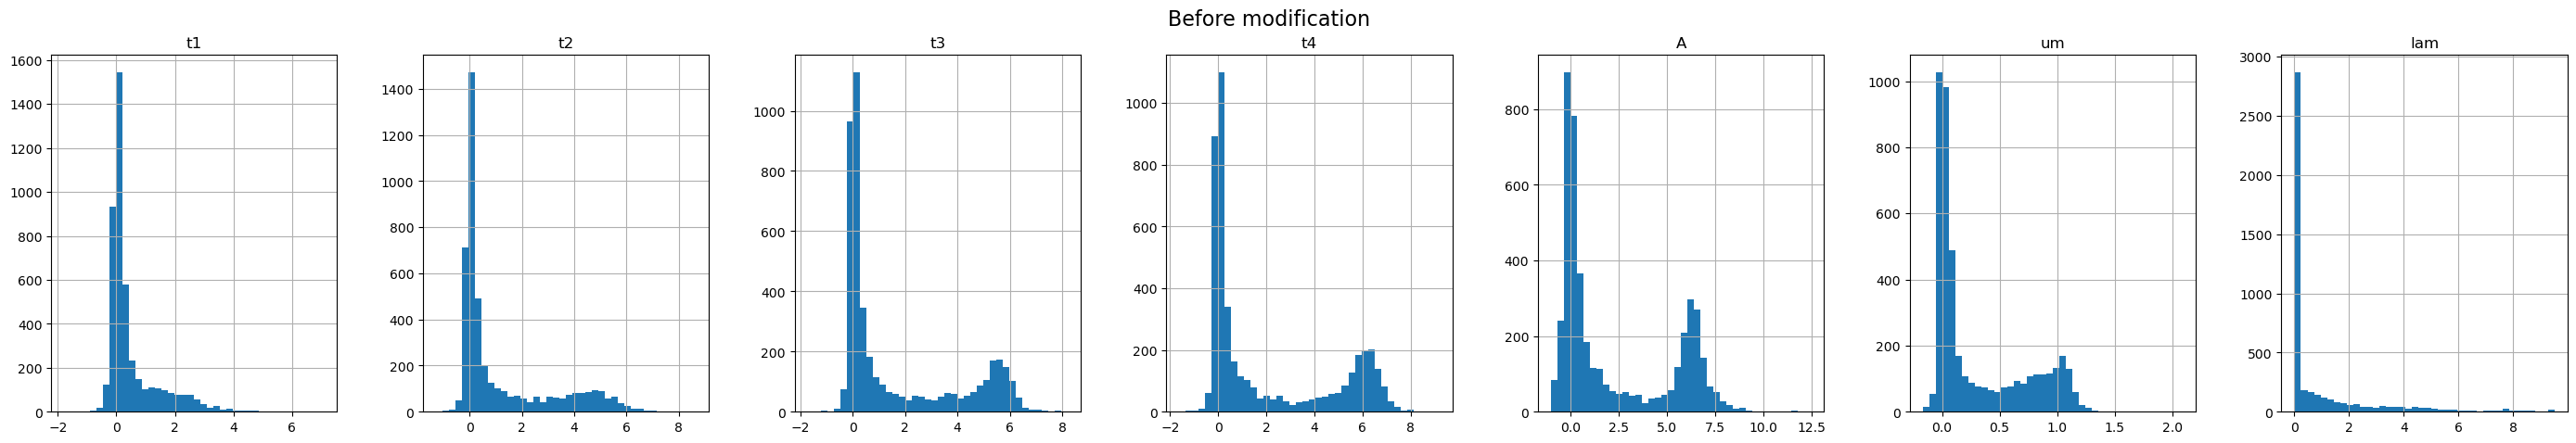

In [23]:
pre_res[["t1", "t2", "t3", "t4" , "A", "um", "lam"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.suptitle("Before modification", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

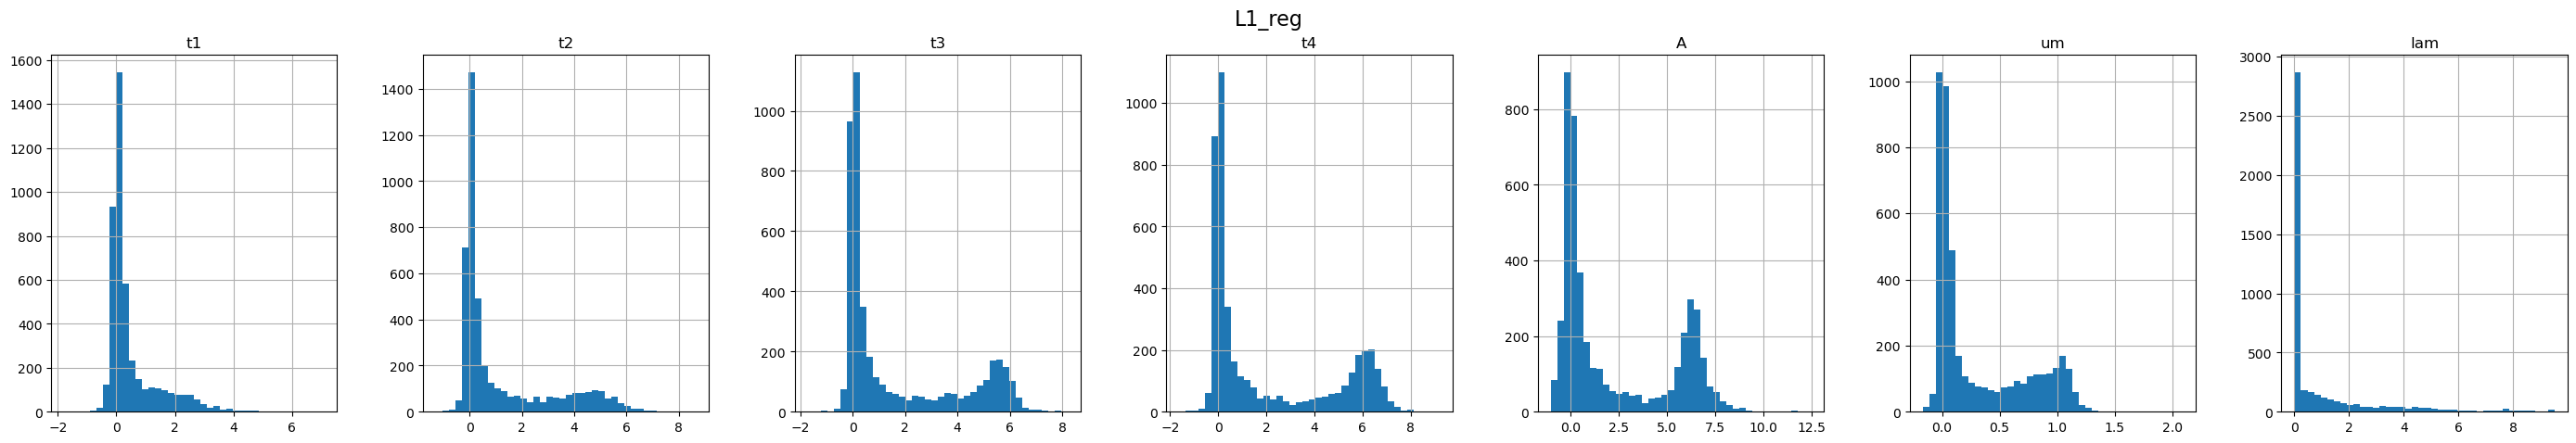

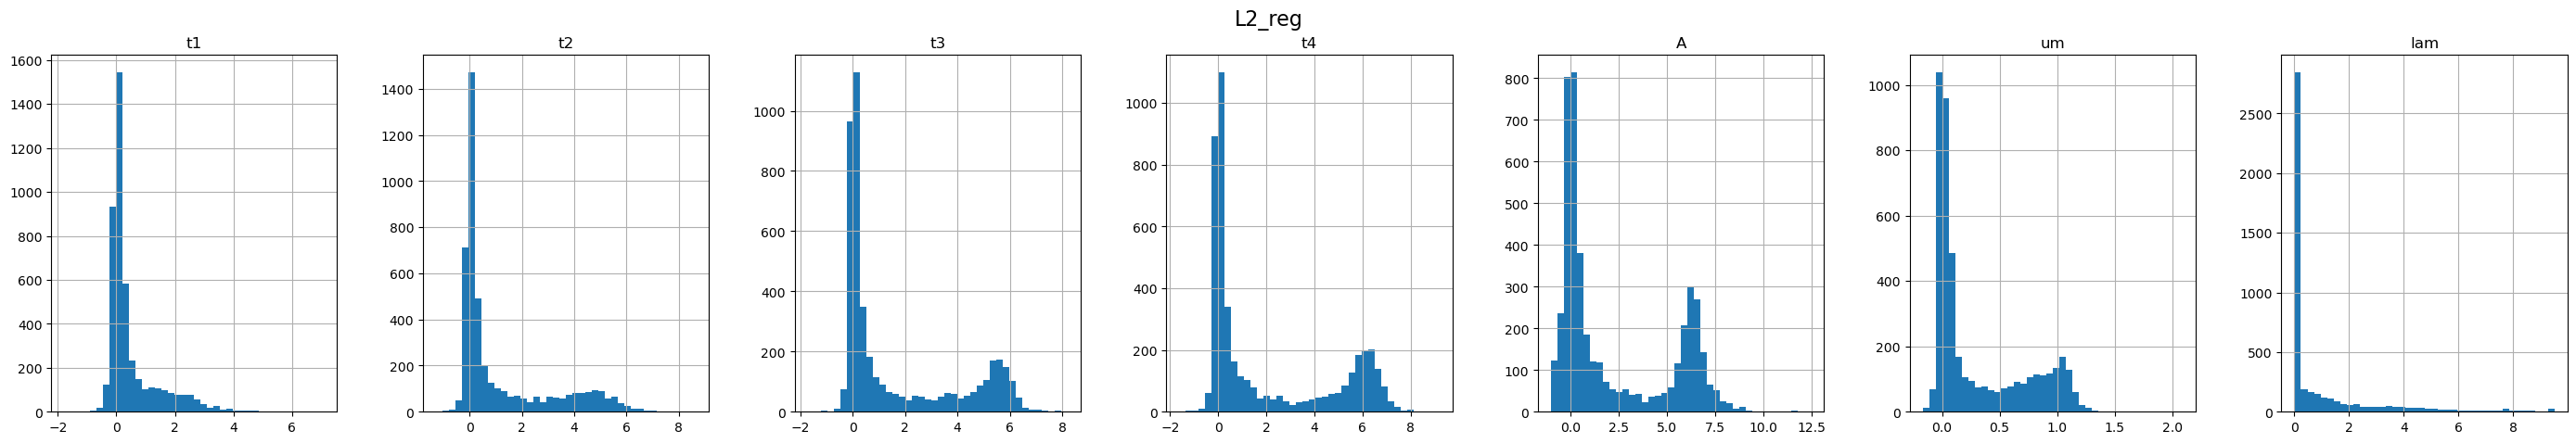

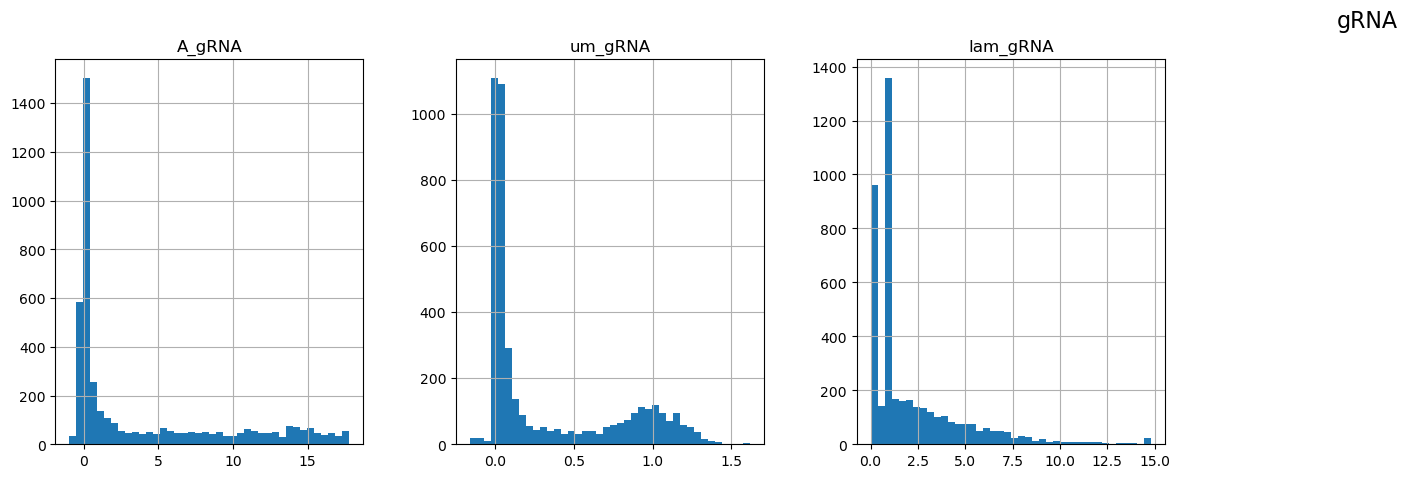

In [24]:
L1_res[["t1", "t2", "t3", "t4" , "A", "um", "lam"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.suptitle("L1_reg", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

L2_res[["t1", "t2", "t3", "t4" , "A", "um", "lam"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.suptitle("L2_reg", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

gRNA[["A_gRNA", "um_gRNA", "lam_gRNA"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.suptitle("gRNA", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

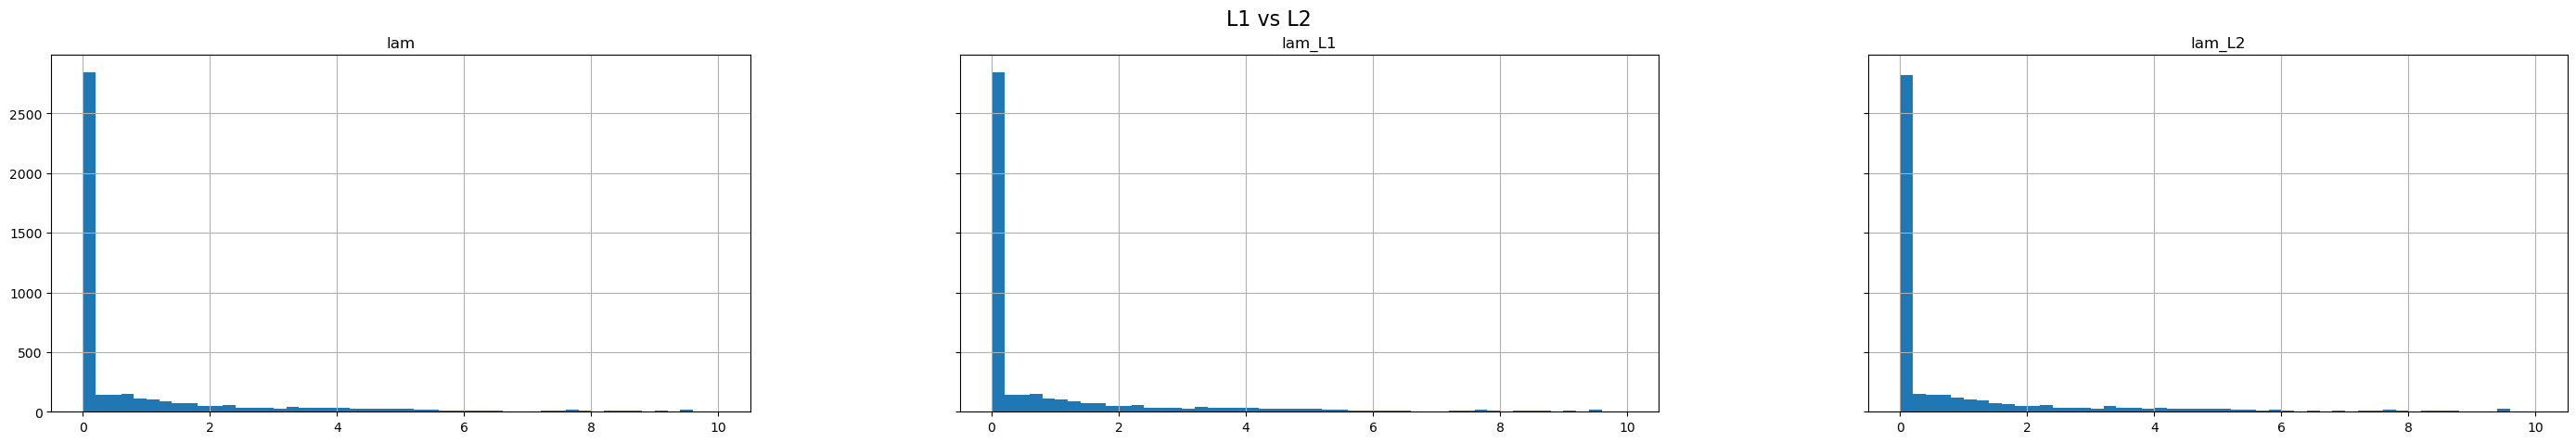

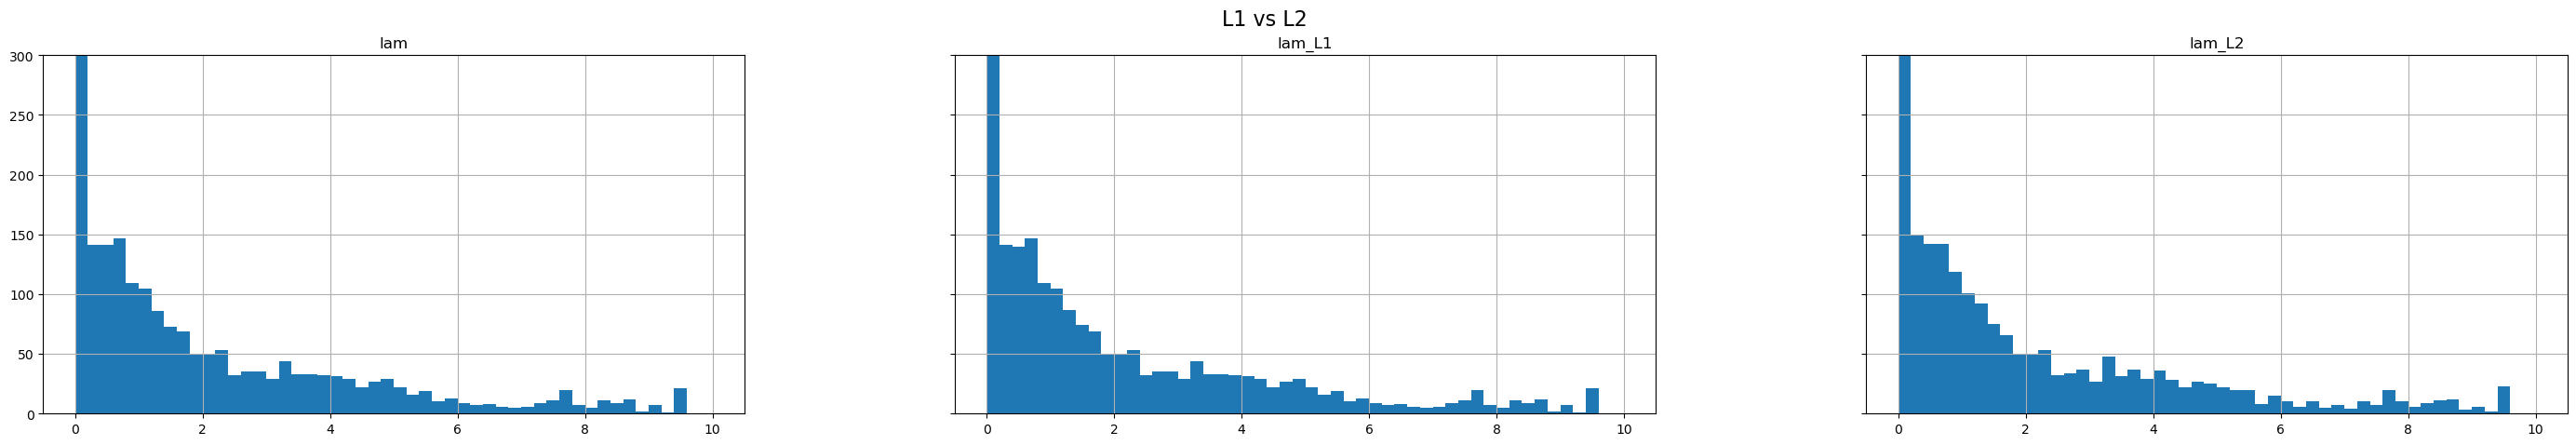

In [25]:
lam_bins = np.arange(0, 10.1, 0.2)

merged_res[["lam", "lam_L1", "lam_L2"]].hist(bins=lam_bins, figsize=(35,5), layout=(1,3), sharex=True, sharey=True)
plt.suptitle("L1 vs L2", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

merged_res[["lam", "lam_L1", "lam_L2"]].hist(bins=lam_bins, figsize=(35,5), layout=(1,3), sharex=True, sharey=True)
plt.suptitle("L1 vs L2", fontsize=16)
plt.ylim(0, 300)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()


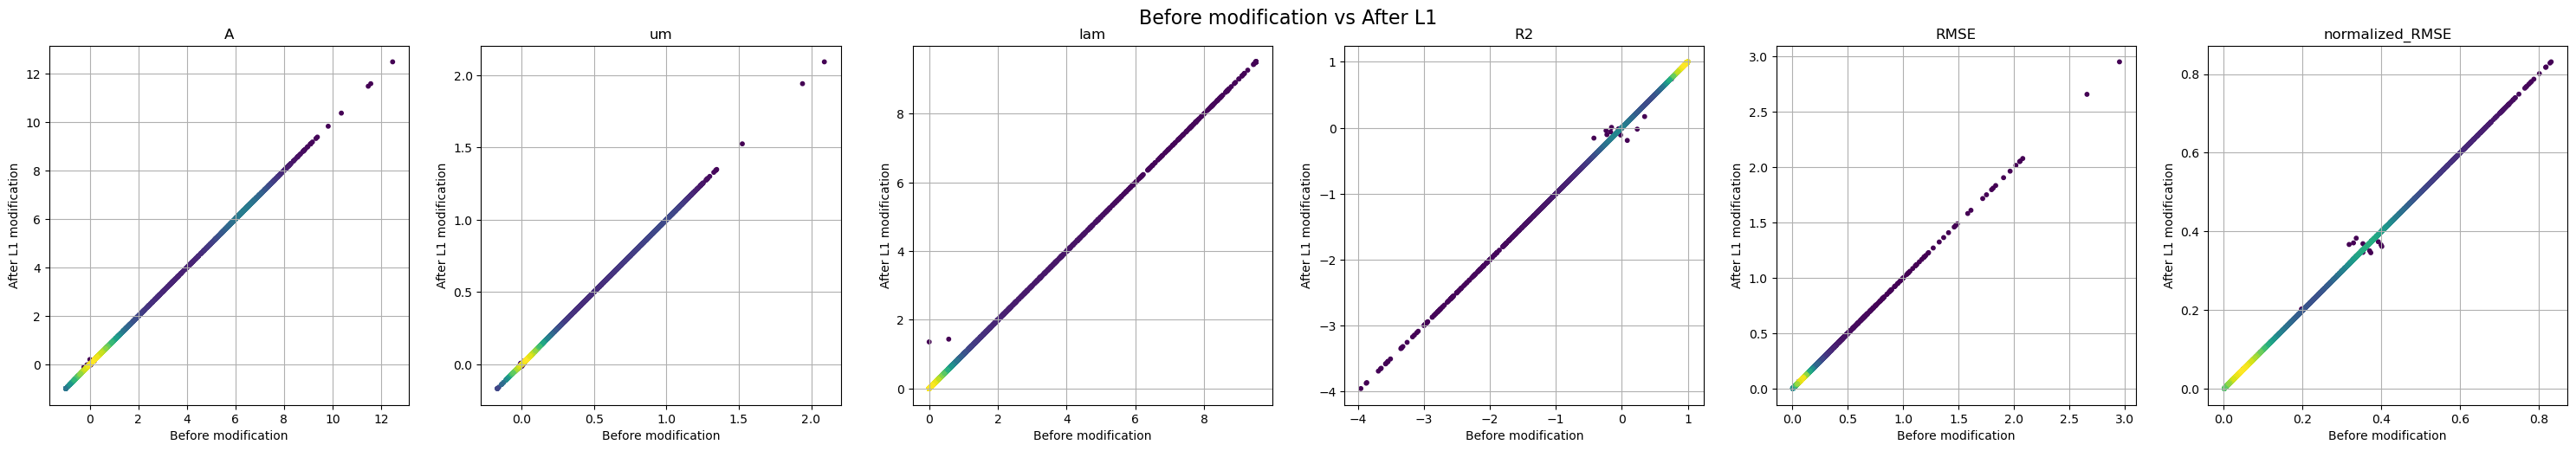

In [26]:
fig, ax = plt.subplots(1,6, figsize=(30,5))

for i, col in enumerate(["A", "um", "lam", "R2", "RMSE", "normalized_RMSE"]):
    x = merged_res[col]
    y = merged_res[col+"_L1"]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax[i].scatter(x, y, c=z, s=10, cmap='viridis')
    ax[i].set_title(col)
    ax[i].set_xlabel("Before modification")
    ax[i].set_ylabel("After L1 modification")
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_title(col)
plt.suptitle("Before modification vs After L1", fontsize=16)
plt.tight_layout()
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

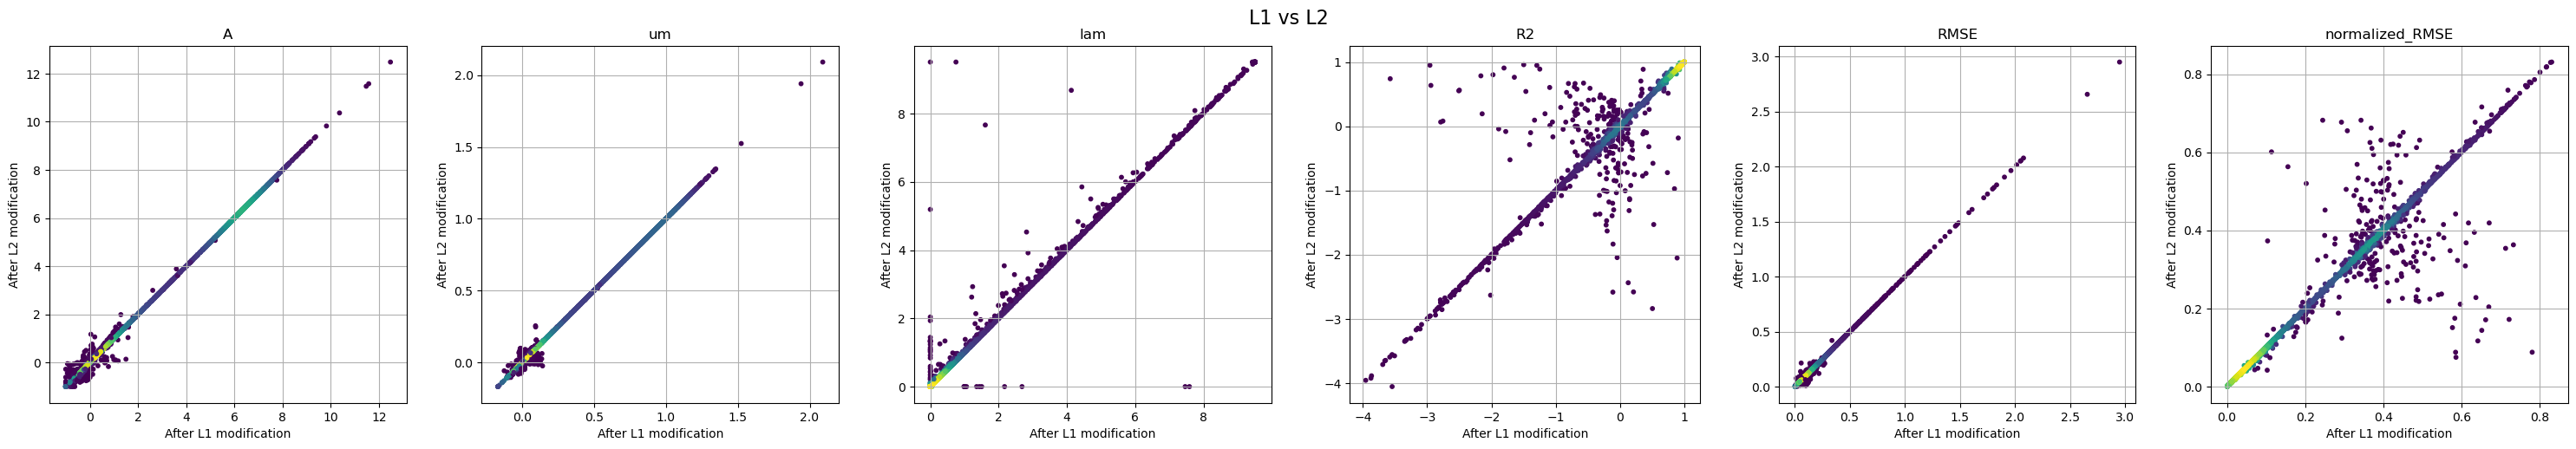

In [27]:
fig, ax = plt.subplots(1,6, figsize=(30,5))

for i, col in enumerate(["A", "um", "lam", "R2", "RMSE", "normalized_RMSE"]):
    x = merged_res[col+"_L1"]
    y = merged_res[col+"_L2"]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax[i].scatter(x, y, c=z, s=10, cmap='viridis')
    ax[i].set_title(col)
    ax[i].set_xlabel("After L1 modification")
    ax[i].set_ylabel("After L2 modification")
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_title(col)

plt.suptitle("L1 vs L2", fontsize=16)
plt.tight_layout()
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

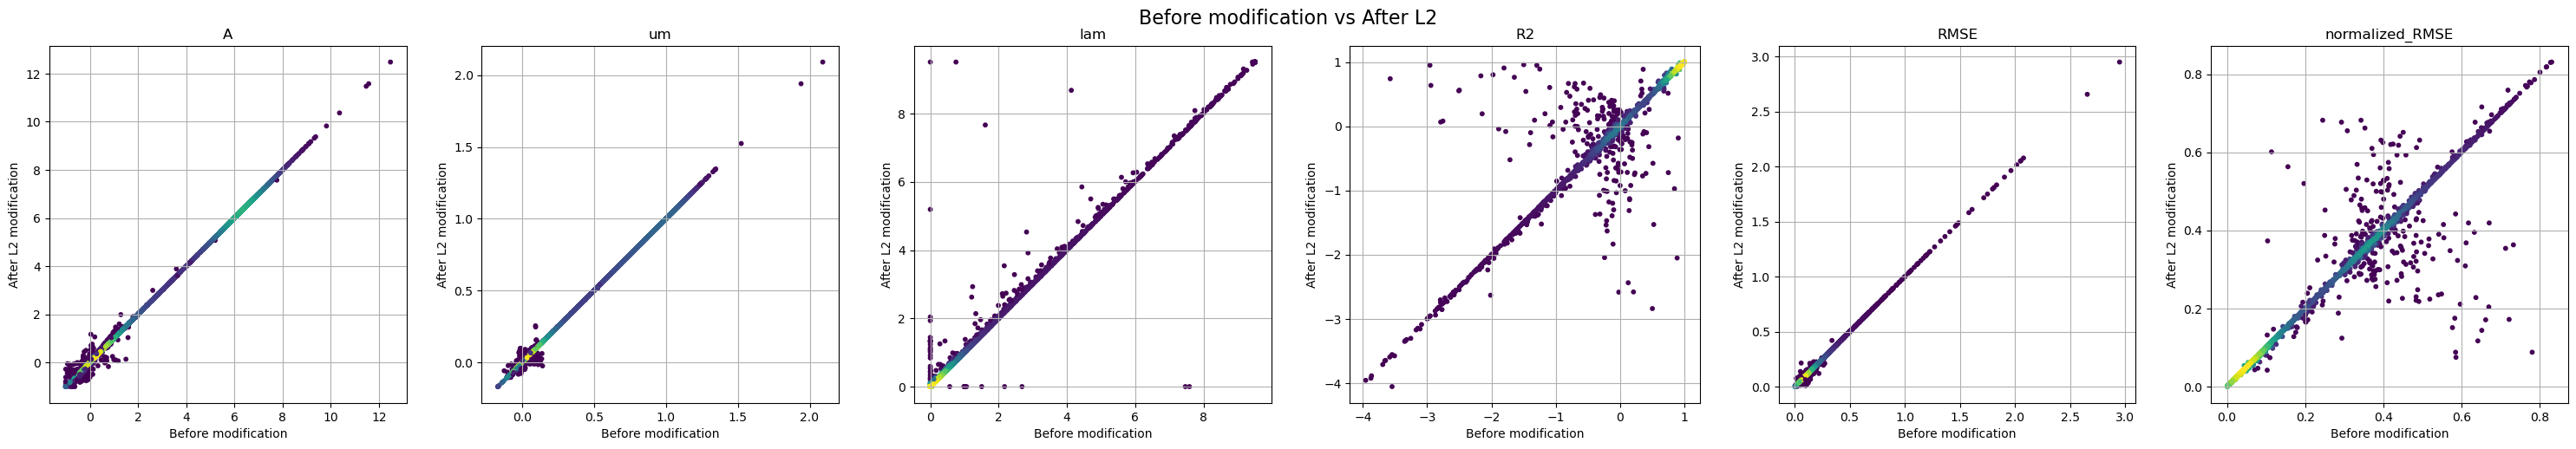

In [28]:
fig, ax = plt.subplots(1,6, figsize=(30,5))

for i, col in enumerate(["A", "um", "lam", "R2", "RMSE", "normalized_RMSE"]):
    x = merged_res[col]
    y = merged_res[col+"_L2"]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax[i].scatter(x, y, c=z, s=10, cmap='viridis')
    ax[i].set_title(col)
    ax[i].set_xlabel("Before modification")
    ax[i].set_ylabel("After L2 modification")
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_title(col)

plt.suptitle("Before modification vs After L2", fontsize=16)
plt.tight_layout()
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

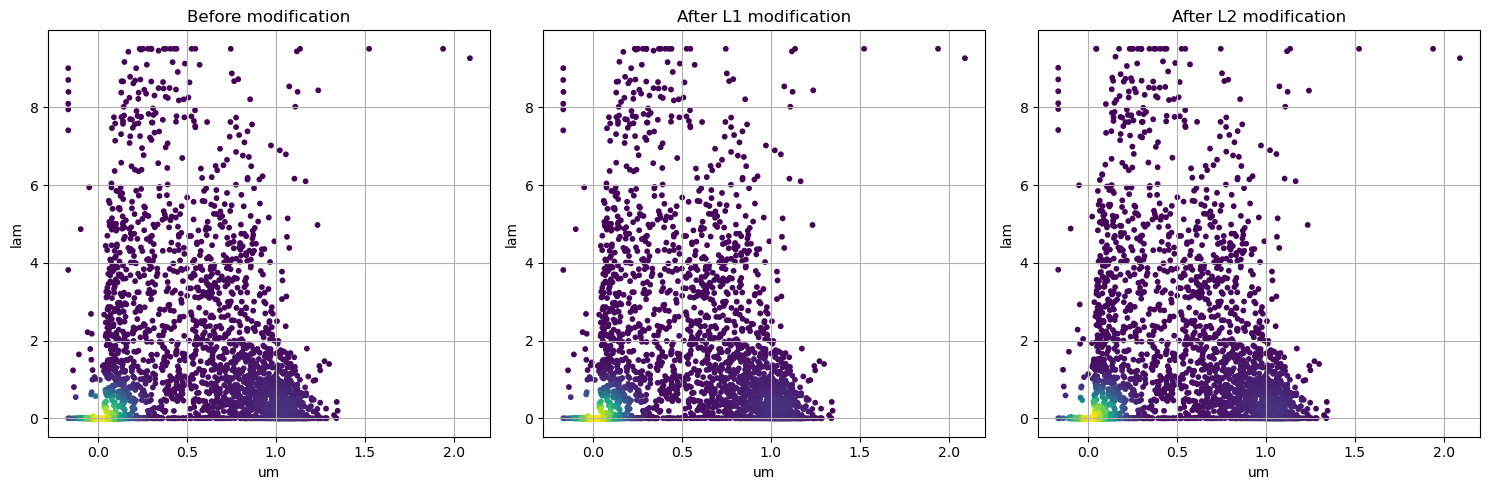

In [29]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

for idx, df in enumerate([pre_res, L1_res, L2_res]):
    x = df["um"]
    y = df["lam"]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax[idx].scatter(x, y, c=z, s=10, cmap='viridis')
    ax[idx].set_xlabel("um")
    ax[idx].set_ylabel("lam")
    ax[idx].grid(True)

ax[0].set_title("Before modification")
ax[1].set_title("After L1 modification")
ax[2].set_title("After L2 modification")

plt.tight_layout()
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

In [20]:
pdf.close()

NameError: name 'pdf' is not defined

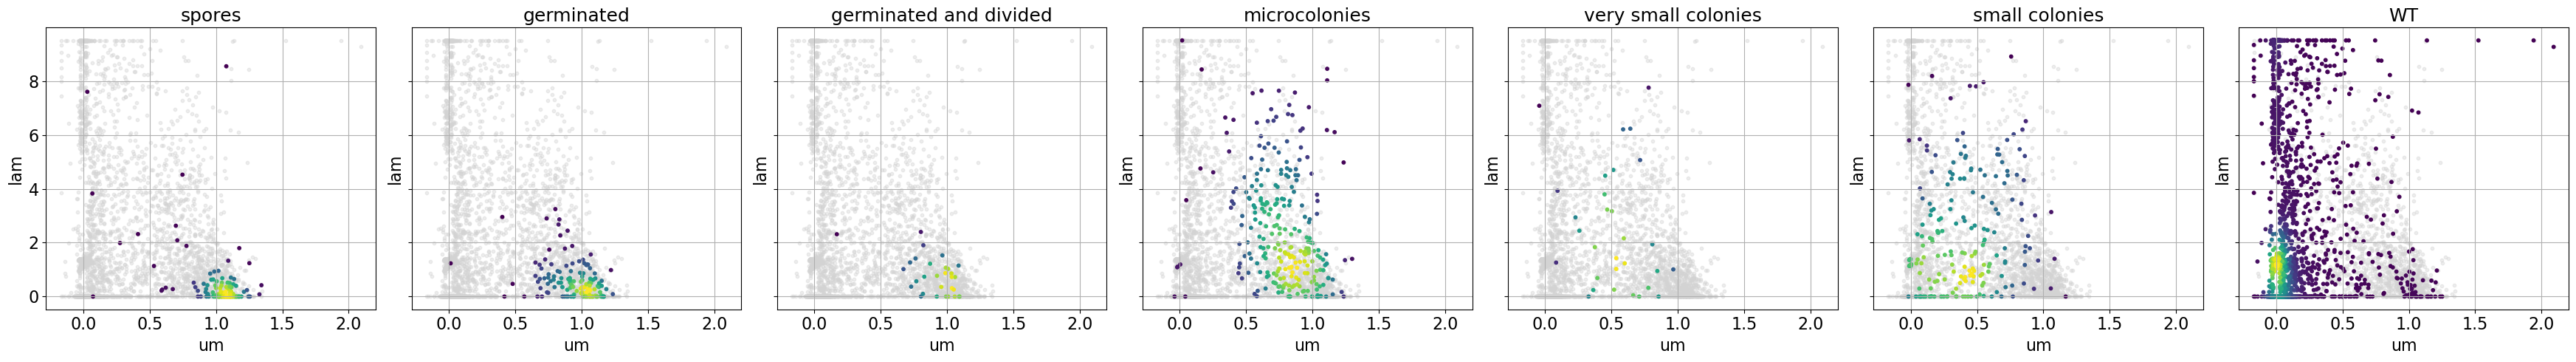

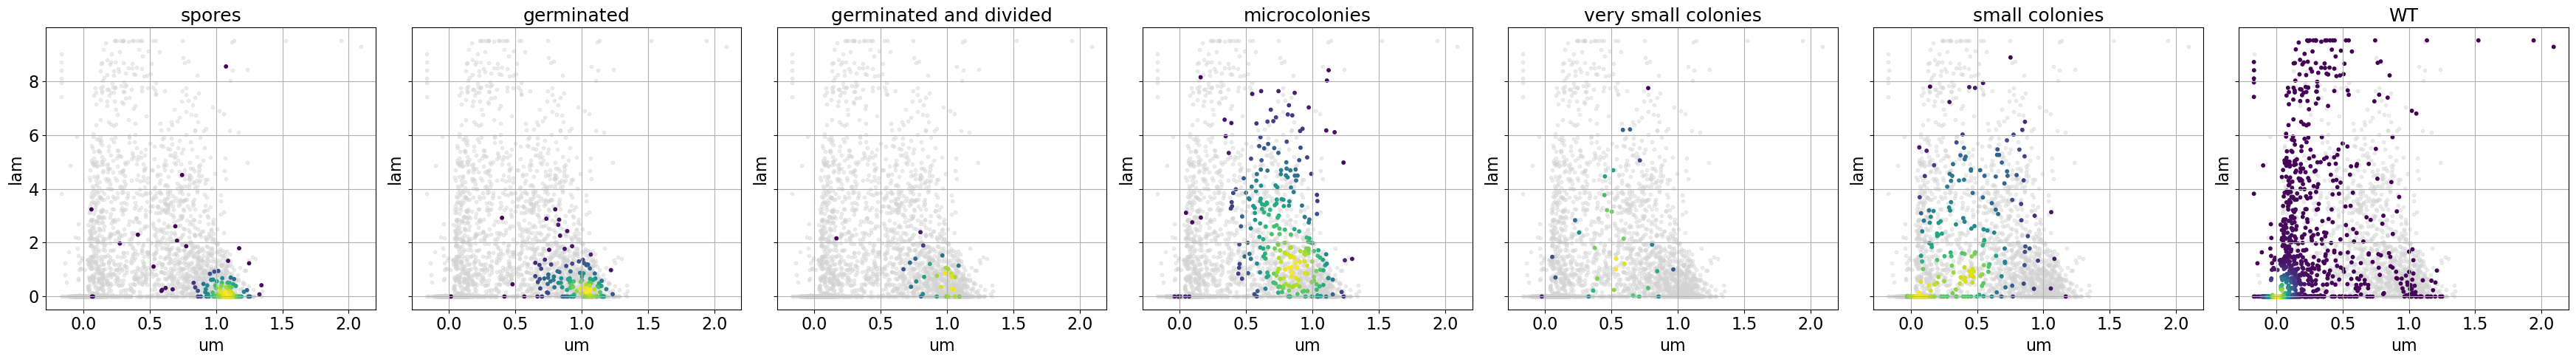

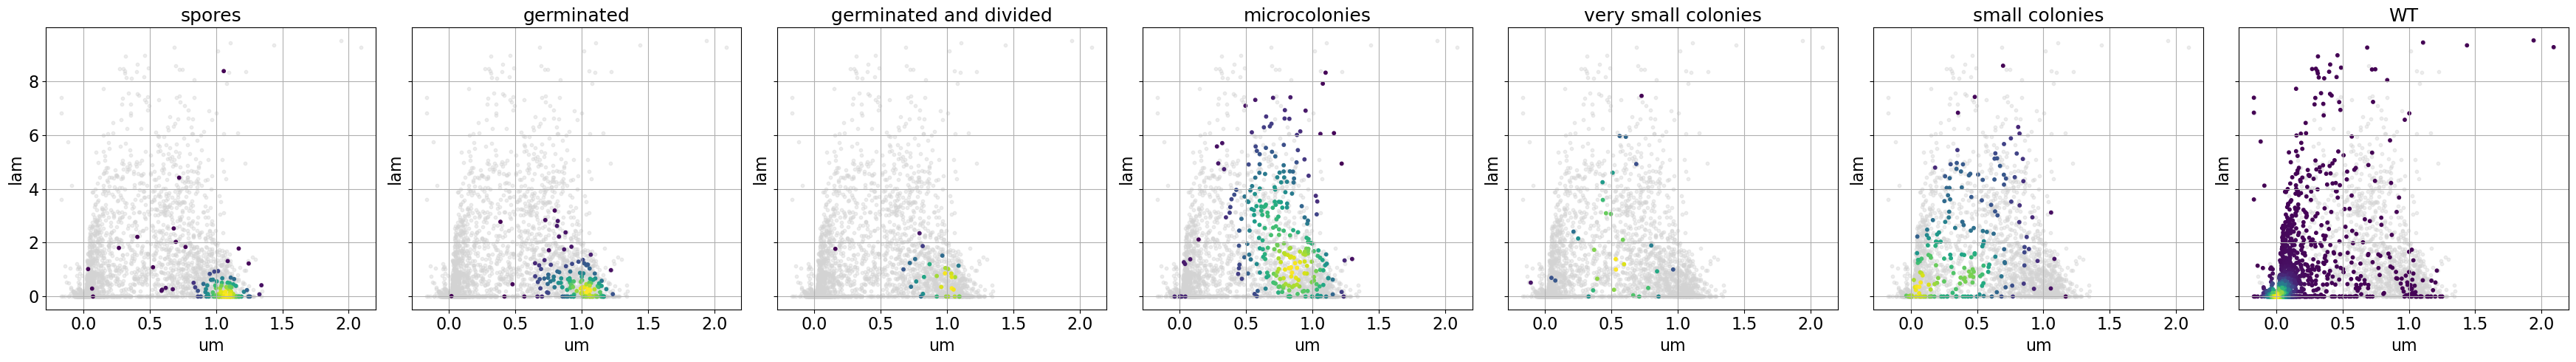

In [ ]:
def category_scatter(df, selected_categories):

    selected_df = df.query("Category in @selected_categories and `One or multi basic phenotypes` == 'One phenotype'")

    fig, ax = plt.subplots(1,len(selected_categories), figsize=(len(selected_categories)*5,5), sharex=True, sharey=True)

    for i, category in enumerate(selected_categories):

        x_all = df["um"]
        y_all = df["lam"]
        ax[i].scatter(x_all, y_all, c='lightgray', s=10, alpha=0.4)

        x = selected_df.query("Category == @category")["um"]
        y = selected_df.query("Category == @category")["lam"]
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        ax[i].scatter(x, y, c=z, s=10, cmap='viridis')
        ax[i].set_title(category, fontsize=18)
        ax[i].set_xlabel("um", fontsize=16)
        ax[i].set_ylabel("lam", fontsize=16)
        ax[i].tick_params(axis='both', which='major', labelsize=16)
        ax[i].grid(True)

    plt.tight_layout()
    plt.show()
    plt.close()

category_scatter(pre_res, selected_categories)
category_scatter(L1_res, selected_categories)
category_scatter(L2_res, selected_categories)

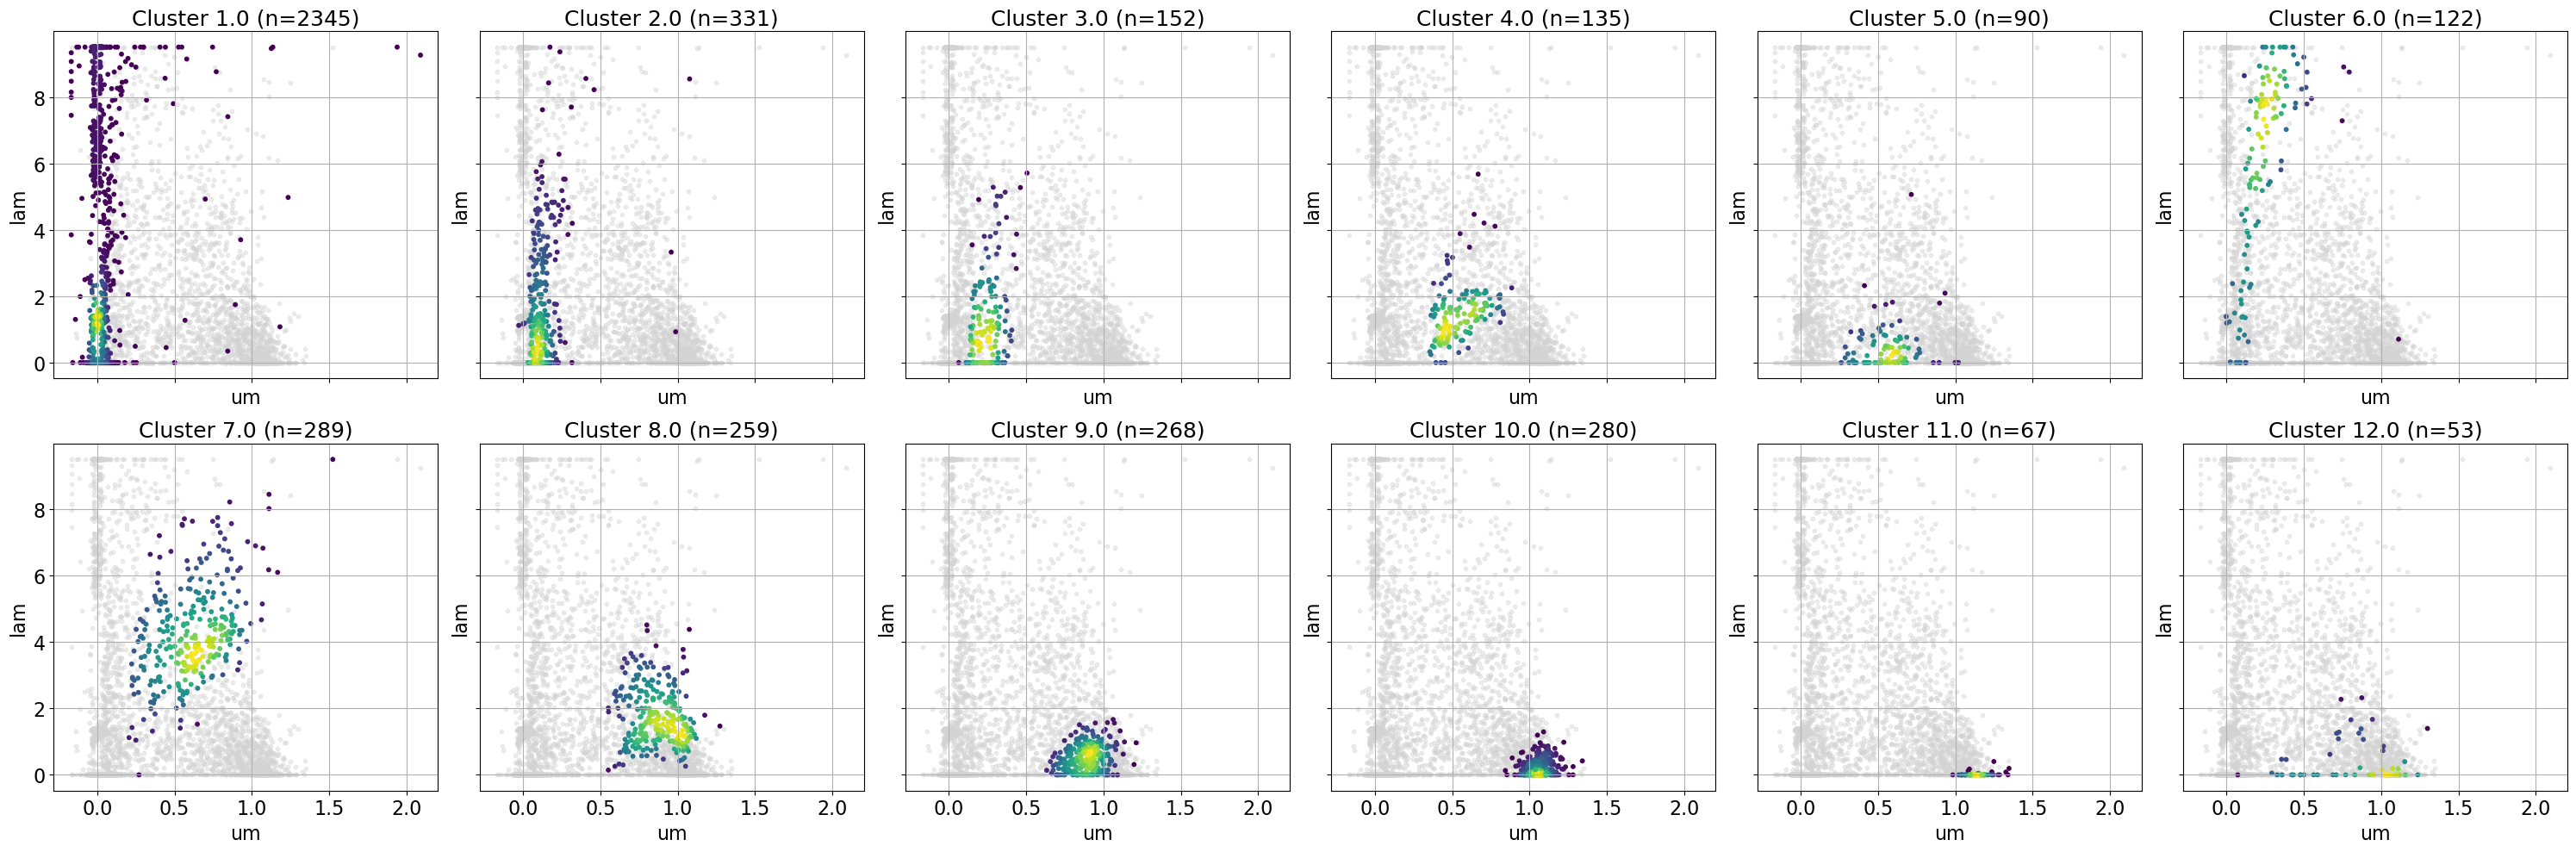

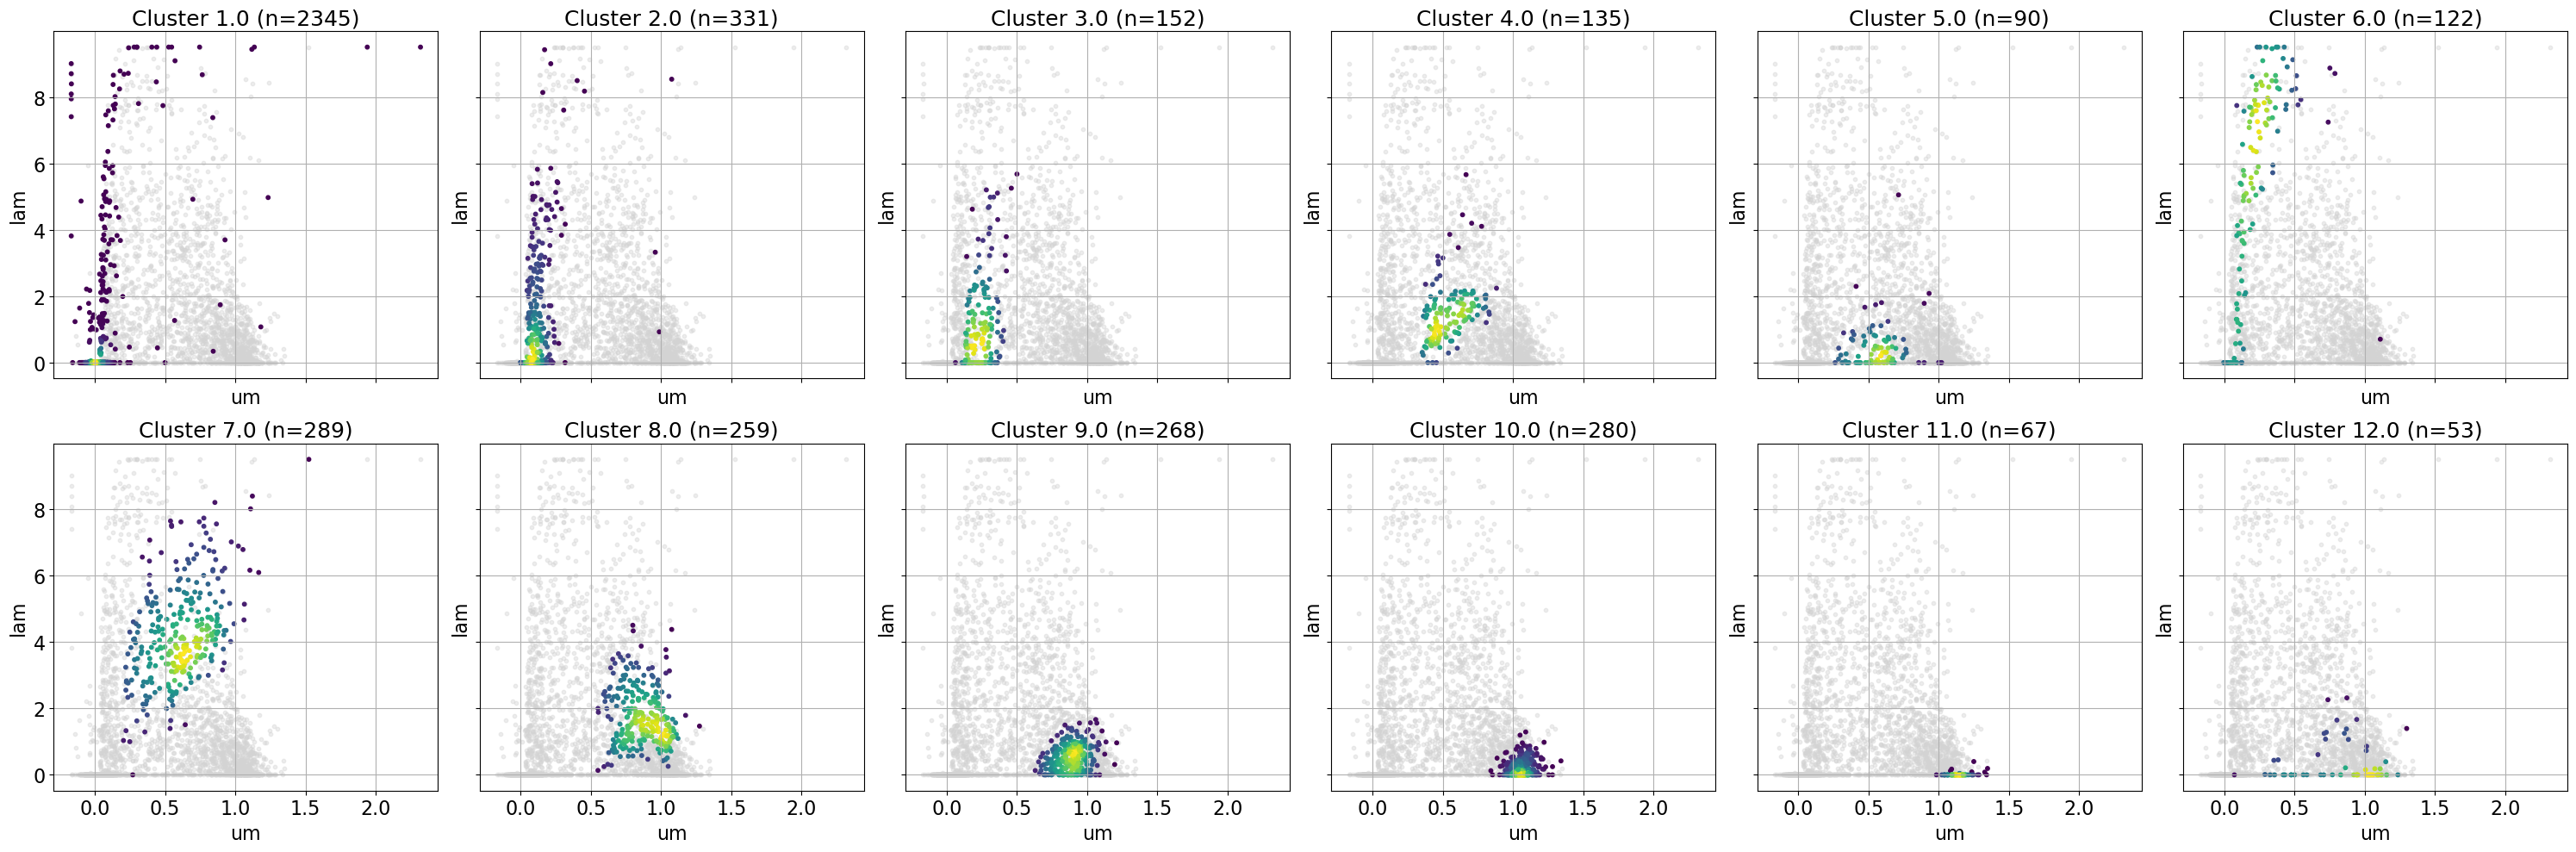

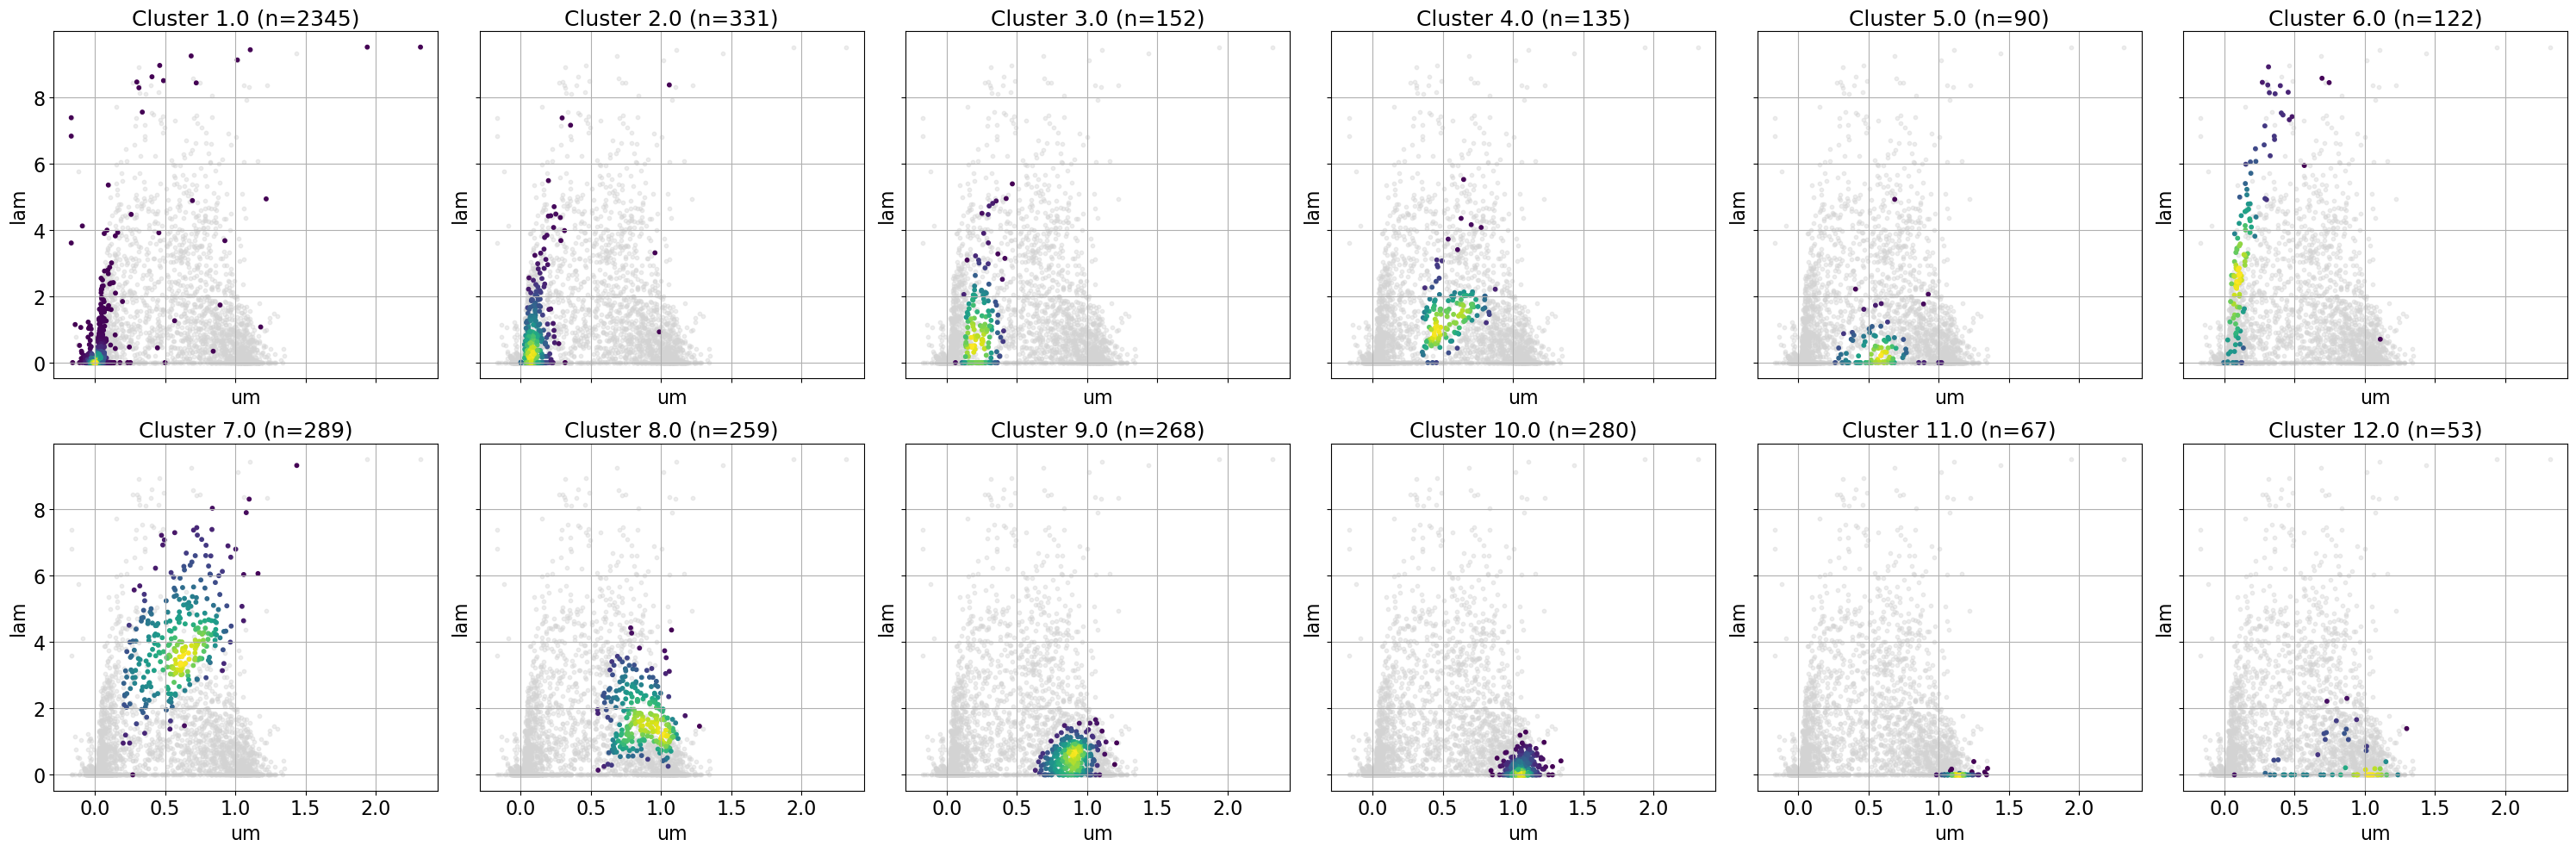

In [49]:
def cluster_scatter(df):

    selected_df = df[df["cluster"].notna()]
    clusters = sorted(selected_df["cluster"].unique().tolist())

    fig, axes = plt.subplots(2,len(clusters)//2, figsize=(len(clusters)//2*5,10), sharex=True, sharey=True)
    axes = axes.flatten()
    for i, cluster in enumerate(clusters):
        ax = axes[i]
        x_all = df["um"]
        y_all = df["lam"]
        ax.scatter(x_all, y_all, c='lightgray', s=10, alpha=0.4)

        x = selected_df.query("cluster == @cluster")["um"]
        y = selected_df.query("cluster == @cluster")["lam"]
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        ax.scatter(x, y, c=z, s=10, cmap='viridis')
        ax.set_title(f"Cluster {cluster} (n={len(x)})", fontsize=18)
        ax.set_xlabel("um", fontsize=16)
        ax.set_ylabel("lam", fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.grid(True)

    plt.tight_layout()
    plt.show()
    plt.close()

cluster_scatter(pre_res)
cluster_scatter(L1_res)
cluster_scatter(L2_res)

In [12]:
merged_res["um_bin"] = pd.cut(merged_res["um"], bins=np.concatenate(([-0.5], np.arange(-0.1, 1.1, 0.2), [2.5])))
merged_res["um_bin_range"] = merged_res["um_bin"].apply(lambda x: f"{x.left}-{x.right}")

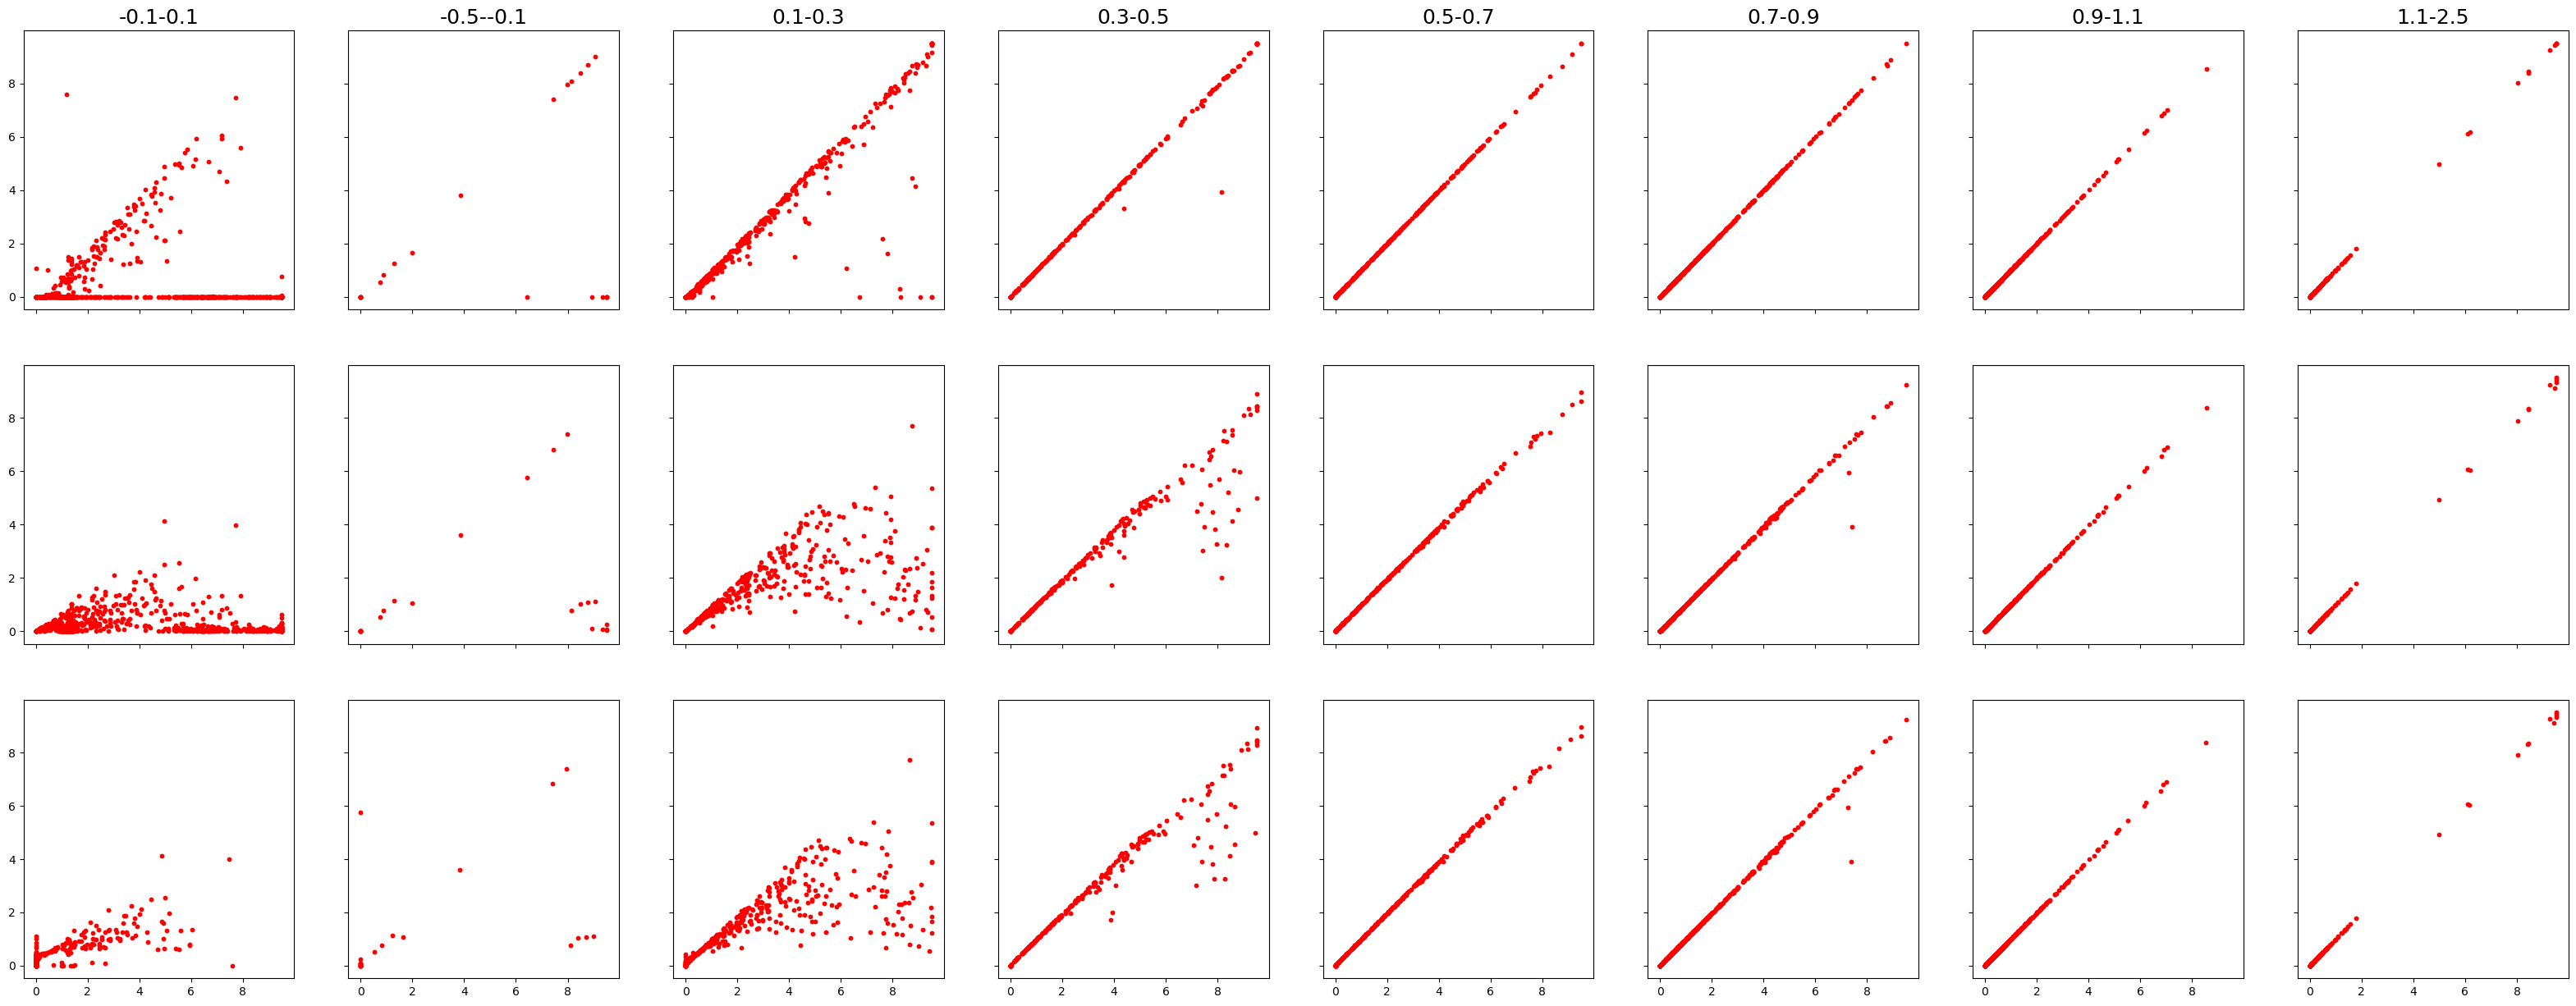

In [13]:
um_bin_range_labels = sorted(merged_res["um_bin_range"].unique().tolist())

fig, ax = plt.subplots(3, len(um_bin_range_labels), figsize=(5*len(um_bin_range_labels), 5*3), sharex=True, sharey=True)

for col, um_bin_range_label in enumerate(um_bin_range_labels):

    x_lam = merged_res.query("um_bin_range == @um_bin_range_label")["lam"]
    x_L1_lam = merged_res.query("um_bin_range == @um_bin_range_label")["lam_L1"]
    x_L2_lam = merged_res.query("um_bin_range == @um_bin_range_label")["lam_L2"]

    ax[0, col].scatter(x_lam, x_L1_lam, c='red', s=10, alpha=1)

    ax[1, col].scatter(x_lam, x_L2_lam, c='red', s=10, alpha=1)

    ax[2, col].scatter(x_L1_lam, x_L2_lam, c='red', s=10, alpha=1)

    ax[0, col].set_title(um_bin_range_label, fontsize=18)

plt.show()
plt.close()


In [14]:
merged_res.query("um_bin_range == '0.3-0.5' and (lam_L1 - lam_L2) > 1 and (lam_L1 - lam_L2) < 2")

Systematic ID          Name FYPOviability DeletionLibrary_essentiality  \
125   SPAC11H11.04          mam2        viable                            V   
524    SPAC1834.05          alg9        viable                            V   
1375    SPAC3G9.02          oar2        viable                            V   
1438    SPAC4C5.03    SPAC4C5.03        viable                            V   
1918    SPAC9G1.07    SPAC9G1.07        viable                            V   
1957  SPAP27G11.16  SPAP27G11.16        viable                            V   
2079    SPBC106.19         ppr10        viable                            V   
2496   SPBC1711.05         srp40        viable                            V   
2638   SPBC19C2.02          pmt1        viable                            V   
3189   SPBC3B9.22c          dad4       unknown               Not_determined   
3276   SPBC428.08c          clr4        viable                            V   
3832   SPCC1281.05          rsc7      inviable                            E   
3858  SPCC1393.07c          mug4        viable                            V   
4468   SPCC965.05c          thp1        viable                            V   

                         time_points_L1 Status_L1   A_L1  um_L1  lam_L1  \
125   [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.422  0.406   9.511   
524   [0.0, 2.352, 5.588, 9.104, 12.48]   Success  1.900  0.317   7.353   
1375  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.842  0.364   7.683   
1438  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  3.314  0.454   8.183   
1918  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.356  0.392   8.245   
1957  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.631  0.441   9.511   
2079  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.401  0.402   8.501   
2496  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.029  0.309   4.060   
2638  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.500  0.419   9.167   
3189  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  1.622  0.140   3.933   
3276  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  1.800  0.302   7.613   
3832  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  3.293  0.346   5.955   
3858  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.208  0.370   9.511   
4468  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.551  0.427   9.511   

      R2_L1  ...  t4_residual  cluster  Consistency at temperatures  \
125   0.991  ...        0.008      1.0                   Consistent   
524   0.947  ...       -0.001      6.0                   Consistent   
1375  0.998  ...       -0.001      6.0                 Inconsistent   
1438  0.864  ...        0.002      2.0                   Consistent   
1918  0.962  ...        0.001      6.0                   Consistent   
1957  0.886  ...        0.003      1.0                   Only at 32   
2079  0.990  ...        0.000      2.0                   Consistent   
2496  0.994  ...       -0.005      3.0                   Consistent   
2638  0.873  ...        0.000      6.0                   Consistent   
3189  0.767  ...        0.004      6.0                          NaN   
3276  0.977  ...       -0.001      6.0                   Consistent   
3832  0.954  ...        0.086      6.0                   Consistent   
3858  0.979  ...        0.011      6.0                   Consistent   
4468  0.972  ...        0.005      6.0                   Only at 32   

      One or multi basic phenotypes        Category     A_gRNA   um_gRNA  \
125                   One phenotype              WT  -0.019800  0.001000   
524                   One phenotype              WT   1.920000  0.151000   
1375                            NaN  small colonies   3.590000  0.467000   
1438                  One phenotype              WT  -0.000572  0.000044   
1918                  One phenotype              WT   1.460000  0.215000   
1957                  One phenotype              WT        NaN       NaN   
2079                  One phenotype              WT   1.470000  0.090300   
2496               

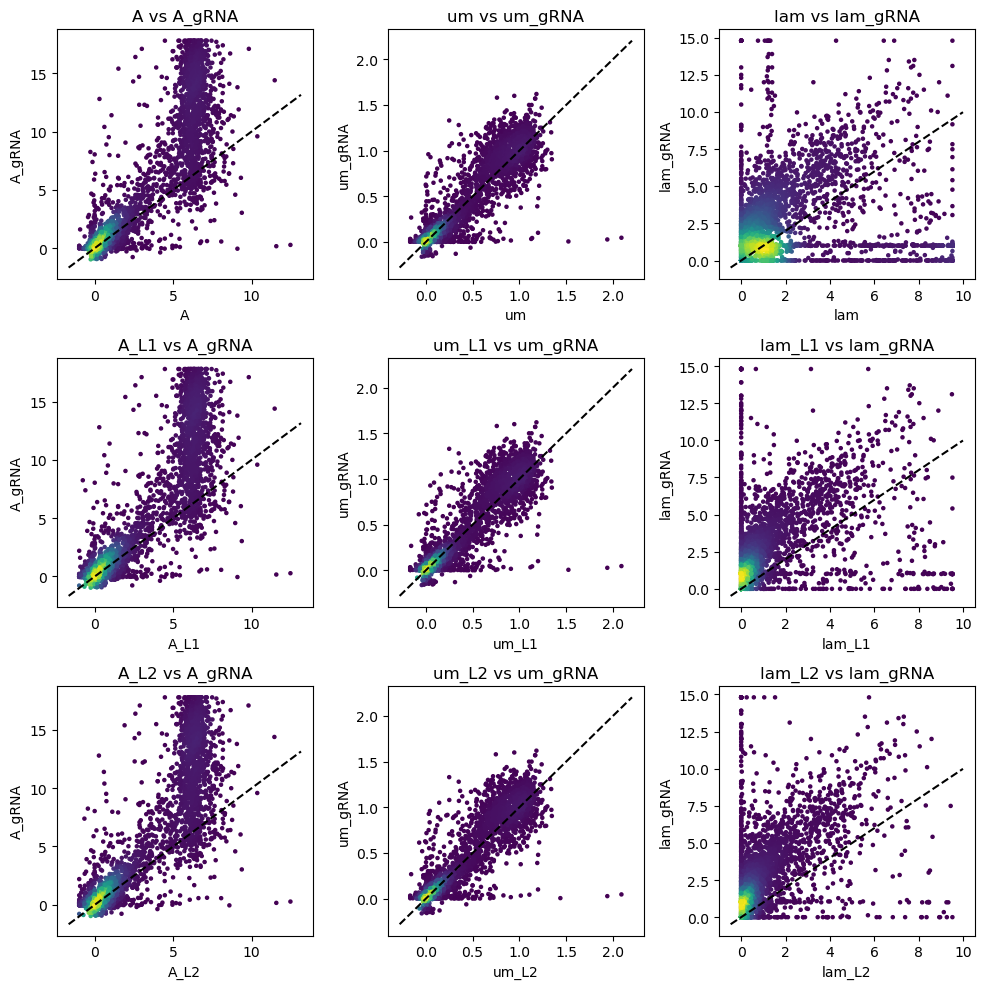

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for row, row_data in enumerate(["", "_L1", "_L2"]):
    for col, col_data in enumerate(["A", "um", "lam"]):
        x = merged_res[f"{col_data}{row_data}"]
        y = merged_res[f"{col_data}_gRNA"]
        x, y = x[x.notna() & y.notna()], y[x.notna() & y.notna()]
        xy = np.vstack([x, y])
        z = gaussian_kde(xy)(xy)
        ax[row, col].scatter(x, y, c=z, s=5, alpha=1)
        # set the diagonal line
        xmin, xmax = ax[row, col].get_xlim()
        ymin, ymax = ax[row, col].get_ylim()
        ax[row, col].plot([xmin, xmax], [xmin, xmax], color="black", linestyle="--")
        ax[row, col].set_xlabel(f"{col_data}{row_data}")
        ax[row, col].set_ylabel(f"{col_data}_gRNA")
        ax[row, col].set_title(f"{col_data}{row_data} vs {col_data}_gRNA")

plt.tight_layout()
plt.show()
plt.close()

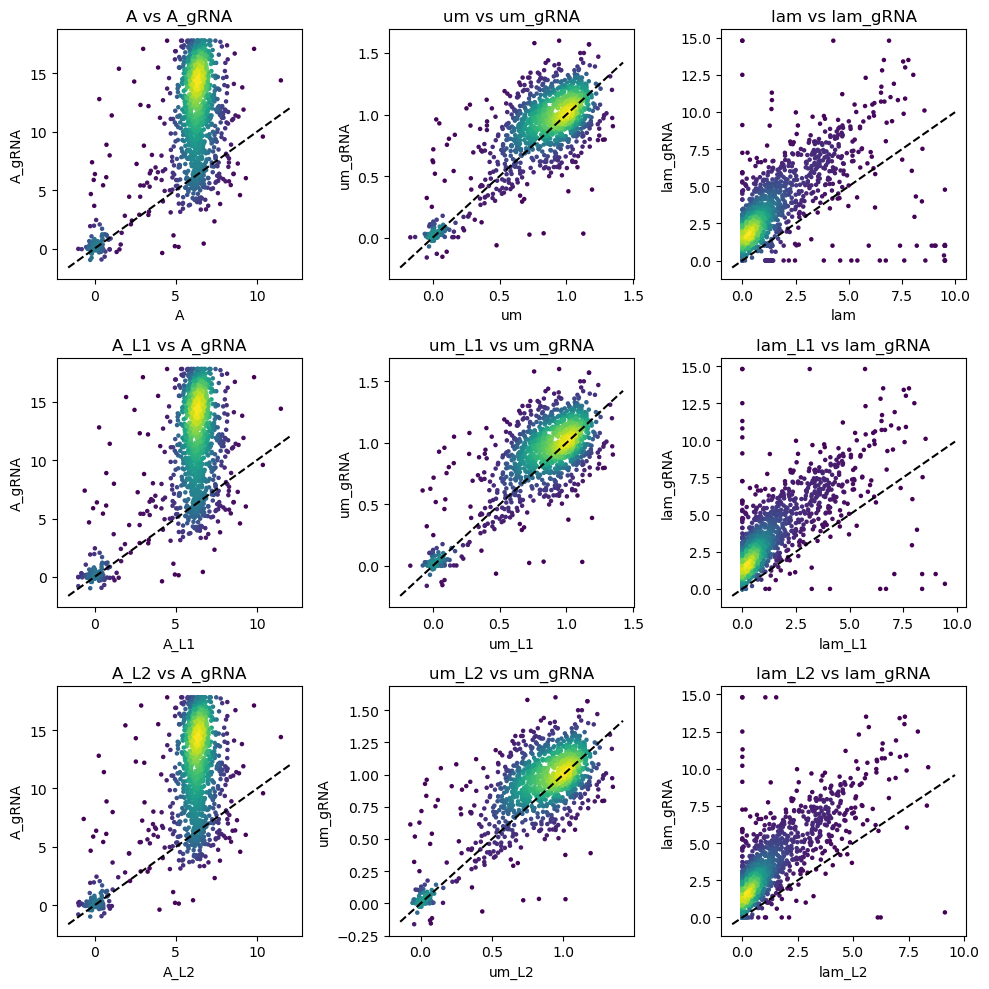

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for row, row_data in enumerate(["", "_L1", "_L2"]):
    for col, col_data in enumerate(["A", "um", "lam"]):
        x = merged_res.query("DeletionLibrary_essentiality != 'V'")[f"{col_data}{row_data}"]
        y = merged_res.query("DeletionLibrary_essentiality != 'V'")[f"{col_data}_gRNA"]
        x, y = x[x.notna() & y.notna()], y[x.notna() & y.notna()]
        xy = np.vstack([x, y])
        z = gaussian_kde(xy)(xy)
        ax[row, col].scatter(x, y, c=z, s=5, alpha=1)
        # set the diagonal line
        xmin, xmax = ax[row, col].get_xlim()
        ymin, ymax = ax[row, col].get_ylim()
        ax[row, col].plot([xmin, xmax], [xmin, xmax], color="black", linestyle="--")
        ax[row, col].set_xlabel(f"{col_data}{row_data}")
        ax[row, col].set_ylabel(f"{col_data}_gRNA")
        ax[row, col].set_title(f"{col_data}{row_data} vs {col_data}_gRNA")

plt.tight_layout()
plt.show()
plt.close()

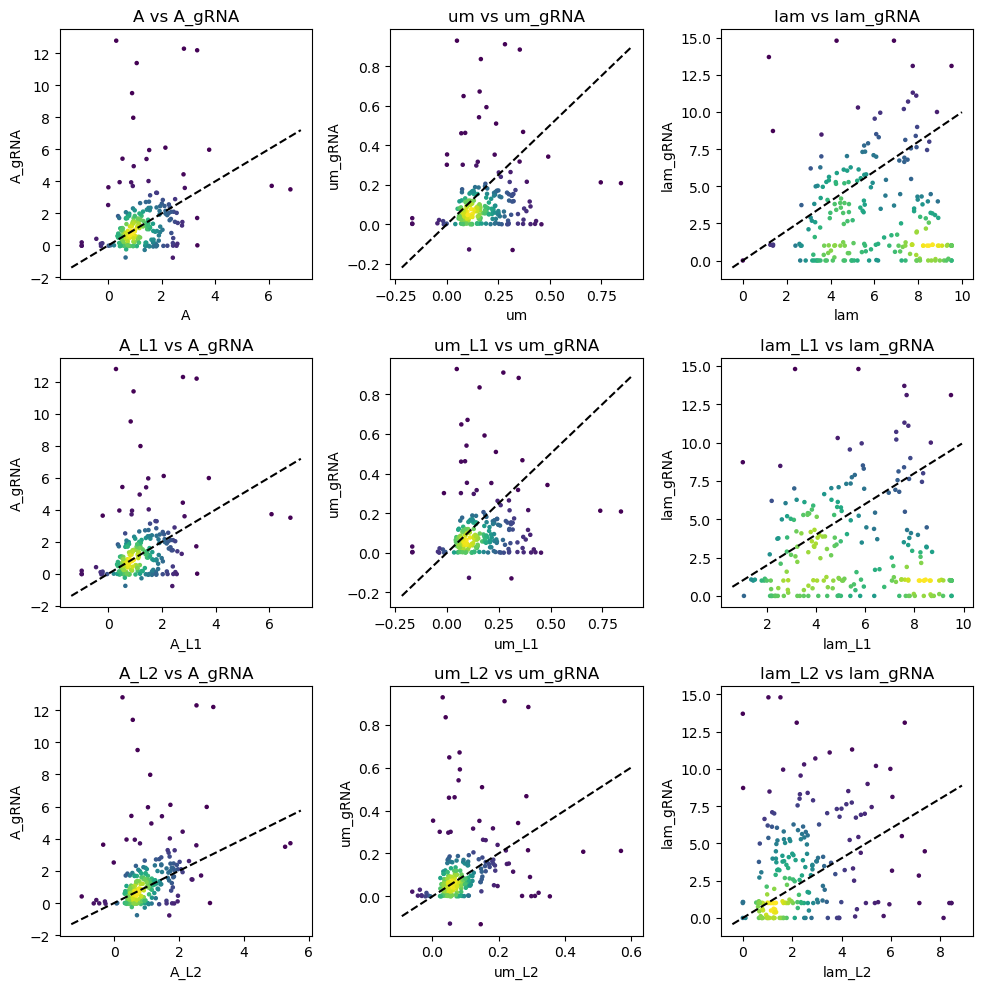

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for row, row_data in enumerate(["", "_L1", "_L2"]):
    for col, col_data in enumerate(["A", "um", "lam"]):
        x = merged_res.query("(lam_L1 - lam_L2) > 1")[f"{col_data}{row_data}"]
        y = merged_res.query("(lam_L1 - lam_L2) > 1")[f"{col_data}_gRNA"]
        x, y = x[x.notna() & y.notna()], y[x.notna() & y.notna()]
        xy = np.vstack([x, y])
        z = gaussian_kde(xy)(xy)
        ax[row, col].scatter(x, y, c=z, s=5, alpha=1)
        # set the diagonal line
        xmin, xmax = ax[row, col].get_xlim()
        ymin, ymax = ax[row, col].get_ylim()
        ax[row, col].plot([xmin, xmax], [xmin, xmax], color="black", linestyle="--")
        ax[row, col].set_xlabel(f"{col_data}{row_data}")
        ax[row, col].set_ylabel(f"{col_data}_gRNA")
        ax[row, col].set_title(f"{col_data}{row_data} vs {col_data}_gRNA")

plt.tight_layout()
plt.show()
plt.close()